# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

# Read Preprocessed File

In [3]:
preprocess = pd.read_csv('intermediate_dataset/preprocessed2.csv', encoding='latin1')

In [4]:
preprocessed_df = preprocess.copy(deep=True)
preprocessed_df['Tag'] = preprocessed_df['Tag'].apply(lambda x: str(x).split(','))

In [5]:
all_tags = [item for sublist in preprocessed_df['Tag'].values for item in sublist]

In [6]:
tag_set = set(all_tags)
unique_tags = list(tag_set)

# PLOT WORDCLOUD

In [7]:
from wordcloud import WordCloud

def word_cloud(tags):
    u = ' '.join(tags)
    # print(u)
    wc=WordCloud(background_color='black',max_font_size=60).generate(u)
    plt.figure(figsize=(16,12))
    plt.imshow(wc, interpolation='bilinear')

33361

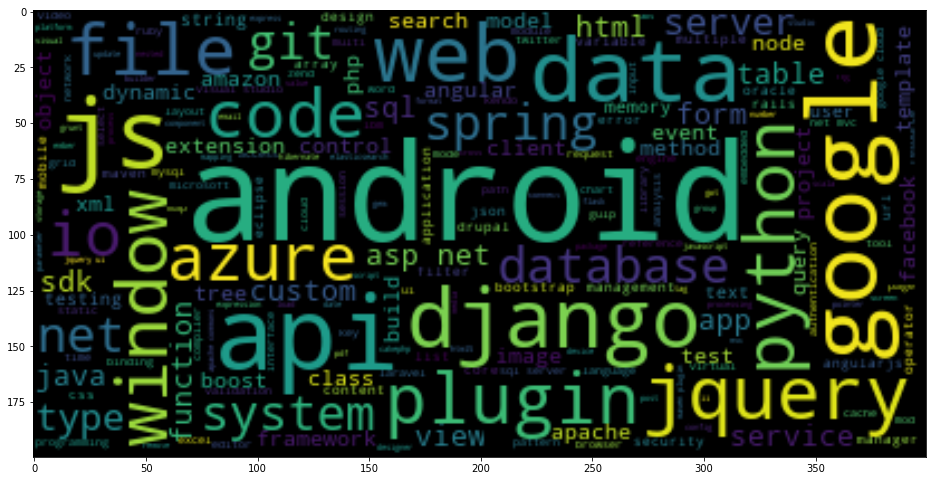

In [8]:
word_cloud(unique_tags)
len(unique_tags)

# FIND THE MOST FREQUENT TAGS

In [9]:
freq = nltk.FreqDist(all_tags)

frequent_tags = freq.most_common(100)

freq_tag = []
for tag in frequent_tags:
    freq_tag.append(tag[0])

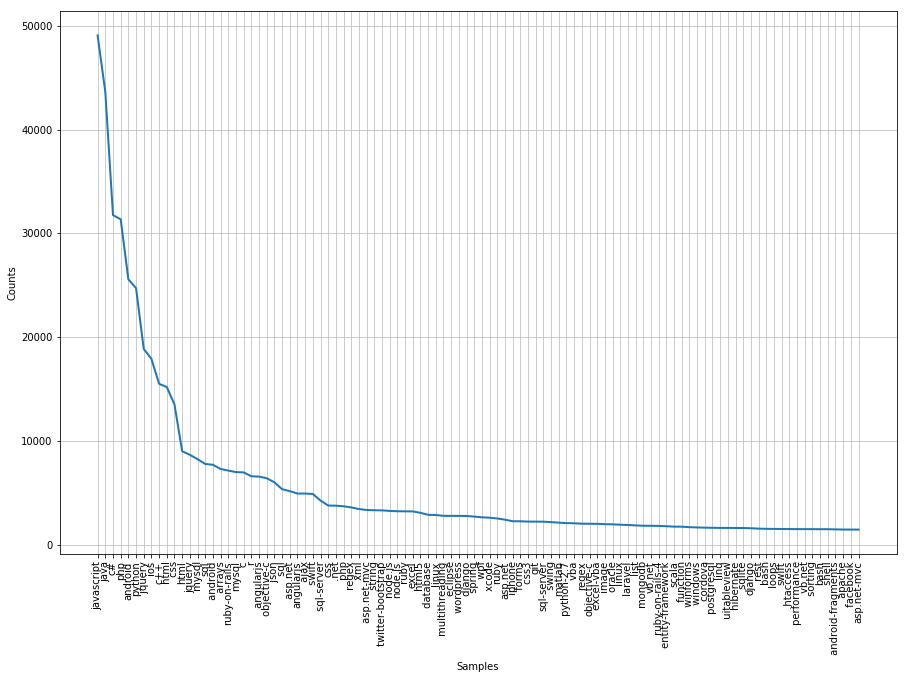

In [10]:
figure, ax = plt.subplots(figsize=(15, 10))
freq.plot(100, cumulative=False)

# Separate Dataset According to Frequent Tags

In [11]:
def most_frequent(t, frequent):
    
    tags = []
    for i in range(len(t)):
        if t[i] in frequent:
            tags.append(t[i])
    return tags

In [12]:
preprocessed_df['Tag'] = preprocessed_df['Tag'].apply(lambda x: most_frequent(x, freq_tag))
preprocessed_df['Tag'] = preprocessed_df['Tag'].apply(lambda x: x if len(x)>0 else None)

In [13]:
# Drop nan values from the dataset
new_preprocess = preprocessed_df.dropna(subset=['Tag', 'Title'], inplace=False)
dataframe = new_preprocess.dropna(subset=['Title'], inplace=False)

In [18]:
dataframe

,Id,Title,Body,Tag
3,20871240,db viewmodel data displaying mvc view,new c# mvc probably obvious error controller l...,"[c#, linq]"
4,20871160,pregmatch function phone number,trouble matching phone number function return ...,[php]
5,20871030,decrypt pixel bitmap,app encrypts pixel image decrypts encryption c...,"[java, android]"
6,20871080,hide shared file alfresco share enterprise,described httpsissuesalfrescocomjirabrowsealf1...,[javascript]
7,20871060,io core data want relationship bidirectional,new io programming done sql stuff year trying ...,[ios]
8,20871000,jquery get original height div,div frame height 200px mouse one div jquery fu...,[jquery]
11,20871390,cs div show,html html head link relstylesheet typetextcss ...,"[css, html]"
12,20870930,delete shortcut duplicate,need create shortcut app installed code work f...,[android]
13,20871110,get ruby thread run right,trying figure use thread trying get hello worl...,"[ruby, multithreading, loops]"
14,20871420,customizing resource route every action,resource post customize path following also ab...,"[ruby-on-rails, ruby-on-rails-4]"


# Classification Process

In [24]:
# Importing sklearn required libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import coo_matrix, hstack
from sklearn.svm import LinearSVC

In [20]:
X1 = dataframe['Body']
X2 = dataframe['Title']
y = dataframe['Tag']

In [21]:
y

3                                 [c#,  linq]
4                                       [php]
5                            [java,  android]
6                                [javascript]
7                                       [ios]
8                                    [jquery]
11                               [css,  html]
12                                  [android]
13            [ruby,  multithreading,  loops]
14          [ruby-on-rails,  ruby-on-rails-4]
15                                      [c++]
16                         [java,  hibernate]
17                   [javascript,  angularjs]
18                 [ios,  objective-c,  json]
19                               [javascript]
20                                      [c++]
21        [javascript,  jquery,  html,  ajax]
22                                   [python]
24                       [c#,  jquery,  json]
25                    [java,  multithreading]
26                           [java,  android]
27                           [java

In [25]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

(343376, 100)

In [31]:
def calculate_tfidf_vector(data):
    
    vectorizer_X = TfidfVectorizer(analyzer = 'word', token_pattern=r"(?u)\S\S+", max_features=10000)
    X_tfidf = vectorizer_X.fit_transform(data)
    
    return X_tfidf

In [32]:
X1_tfidf = calculate_tfidf_vector(X1)
X2_tfidf = calculate_tfidf_vector(X2)
X_tfidf = hstack([X1_tfidf, X2_tfidf])

# Creating Validation Set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0)

In [34]:
X_train.shape

(274700, 20000)

In [35]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [36]:
def apply_model(classifier, X_Train, y_Train, X_Test, y_Test):
    
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_Train, y_Train)
    y_Pred = clf.predict(X_Test)
    
    accuracy = clf.score(X_Test, y_Test)
    
    return accuracy, y_Pred

# Multinomial Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn_accuracy, mn_y_pred = apply_model(mn, X_train, y_train, X_test, y_test)

# Support Vector Machine

In [38]:
svc = LinearSVC()
svc_accuracy, svc_y_pred = apply_model(svc, X_train, y_train, X_test, y_test)

# Bernoulli Naive Bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_accuracy, bnb_y_pred = apply_model(bnb, X_train, y_train, X_test, y_test)

In [40]:
print(mn_accuracy, svc_accuracy, bnb_accuracy)

0.25120857359193893 0.37129419302230765 0.09311841108975479


In [41]:
print(classification_report(y_test, mn_y_pred))
print(classification_report(y_test, svc_y_pred))


c:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.82      0.71      0.77       297
           1       0.25      0.03      0.06       727
           2       0.70      0.46      0.55      1043
           3       0.27      0.39      0.32      1539
           4       0.32      0.58      0.41       290
           5       0.52      0.40      0.45      1347
           6       0.36      0.24      0.29       303
           7       0.56      0.32      0.41      1454
           8       0.57      0.23      0.32      1069
           9       0.48      0.15      0.23       678
          10       0.27      0.05      0.09       319
          11       0.79      0.27      0.40       316
          12       0.51      0.75      0.61      2710
          13       0.18      0.42      0.25       448
          14       0.03      0.00      0.00       584
          15       0.57      0.24      0.34       565
          16       0.40      0.22      0.28       567
          17       0.72    

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

clf = OneVsRestClassifier(svc)
clf.fit(X_train, y_train)
y_score = clf.decision_function(X_test)
# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = y_bin.shape[1]
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
    
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))


AttributeError: 'MultinomialNB' object has no attribute 'decision_function'

In [ ]:
plt.figure()
from sklearn.utils.fixes import signature
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall['micro'], precision['micro'], color='r', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='r', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve(SVM)')


In [42]:
# from yellowbrick.classifier import PrecisionRecallCurve
# viz = PrecisionRecallCurve(MultinomialNB())
# viz.fit(X_train, y_train)
# viz.score(X_test, y_test)
# viz.poof()